<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [262]:
import pandas as pd
import numpy as np

%matplotlib inline

In [263]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [264]:
taxi_jan_df = pd.read_parquet("Data/yellow_tripdata_2019-01.parquet")#, engine='fastparquet')

In [265]:
taxi_jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [266]:
taxi_data = pd.concat([taxi_jan_df])

In [267]:
taxi_data.shape

(7696617, 19)

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [268]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [269]:
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [270]:
taxi_data.shape

(7696617, 9)

In [271]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

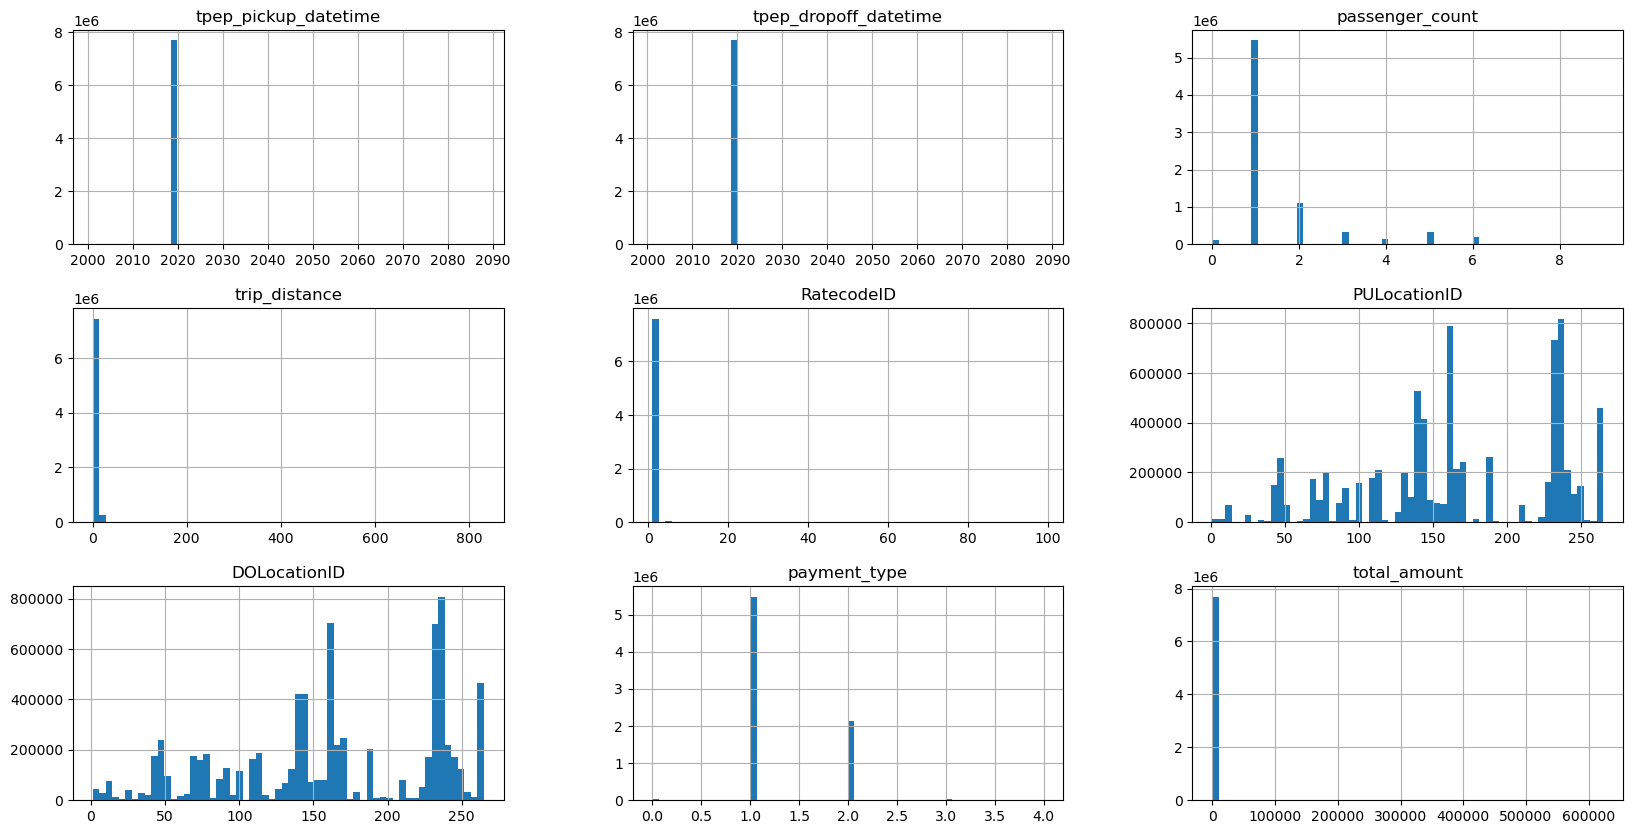

In [272]:
taxi_data.hist(
    figsize=(20,10),
    bins = 60,
)

In [273]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

In [274]:
taxi_data.index

RangeIndex(start=0, stop=7696617, step=1)

<Axes: xlabel='index', ylabel='total_amount'>

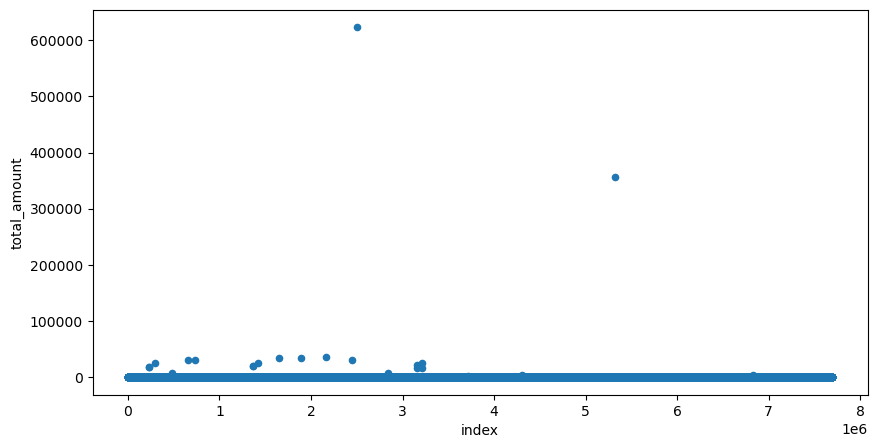

In [275]:
taxi_data.reset_index().plot(
    kind= 'scatter',
    y = 'total_amount',
    x = 'index',
    figsize = (10,5)
)



<Axes: xlabel='index', ylabel='total_amount'>

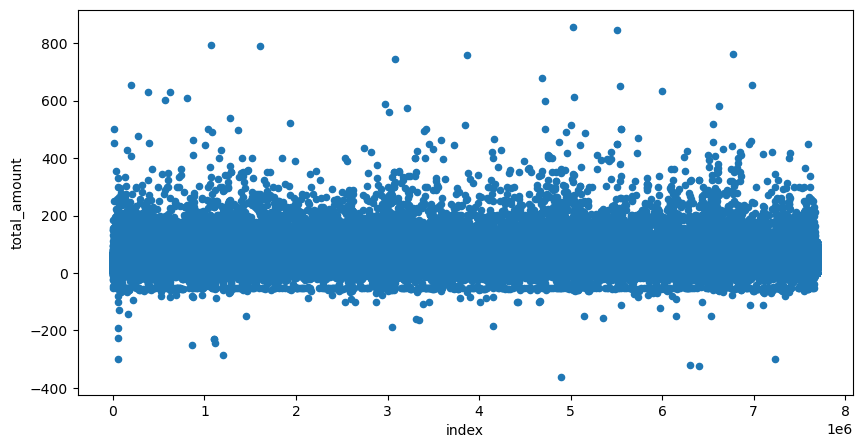

In [276]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(
    kind= 'scatter',
    y = 'total_amount',
    x = 'index',
    figsize = (10,5)
)

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

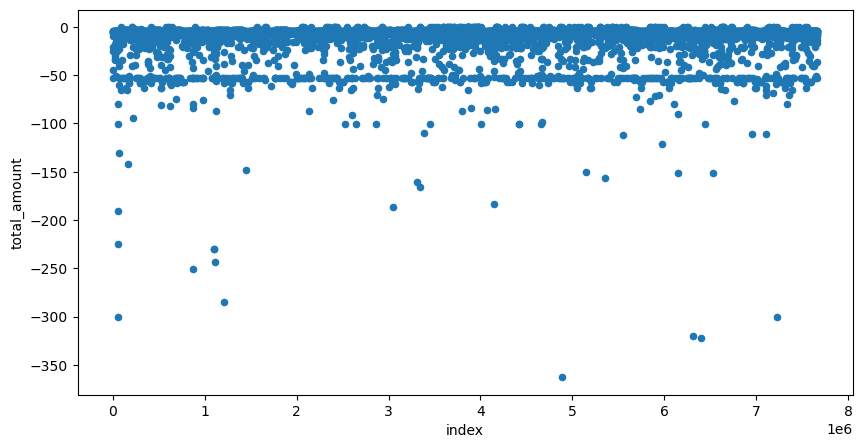

In [277]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(
    kind= 'scatter',
    y = 'total_amount',
    x = 'index',
    figsize = (10,5)
)

In [278]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

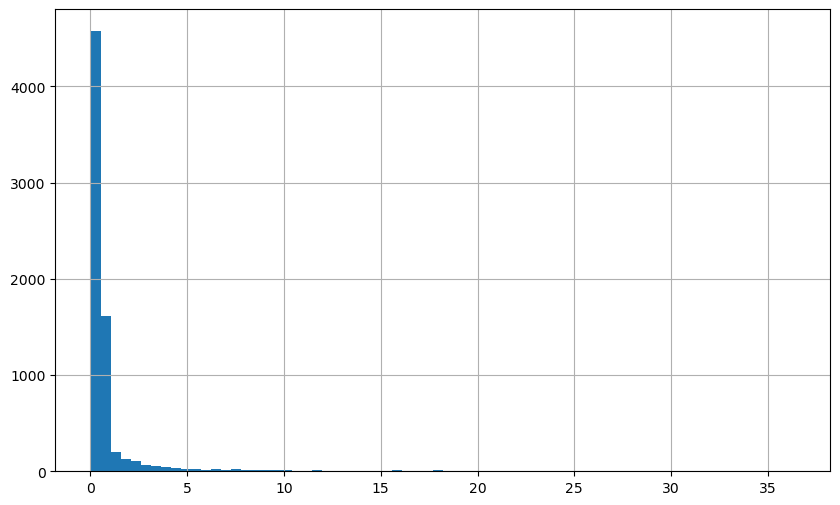

In [279]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(10,6),bins=70)

In [280]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [281]:
taxi_data['total_amount'].max()

623261.66

In [282]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [283]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [284]:
taxi_data['total_amount'].mean()

15.810651344610214

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [336]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']<200)]

In [337]:
taxi_data_filtered['total_amount'].max()

199.98

In [338]:
taxi_data_filtered.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [339]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'].dt.year==2019]

In [340]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7696617, 9)
(7687877, 9)


In [341]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [342]:
taxi_data_prepaired = taxi_data_filtered.copy()

In [343]:
taxi_data_prepaired.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

changing original data types to suitable types


In [344]:
taxi_data_prepaired.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepaired.loc[:,'tpep_pickup_datetime'])
taxi_data_prepaired.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepaired.loc[:,'tpep_dropoff_datetime'])

In [345]:
taxi_data_prepaired.loc[:,'RatecodeID'] = taxi_data_prepaired.loc[:,'RatecodeID'].astype(str)
taxi_data_prepaired.loc[:,'PULocationID'] = taxi_data_prepaired.loc[:,'PULocationID'].astype(str)
taxi_data_prepaired.loc[:,'DOLocationID'] = taxi_data_prepaired.loc[:,'DOLocationID'].astype(str)
taxi_data_prepaired.loc[:,'payment_type'] = taxi_data_prepaired.loc[:,'payment_type'].astype(str)

In [346]:
taxi_data_prepaired.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [347]:
taxi_data_prepaired.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00


In [400]:
taxi_data_prepaired['transaction_date']=pd.to_datetime(taxi_data_prepaired['tpep_pickup_datetime'].dt.date)
taxi_data_prepaired['transaction_year']=taxi_data_prepaired['tpep_pickup_datetime'].dt.year
taxi_data_prepaired['transaction_month']=taxi_data_prepaired['tpep_pickup_datetime'].dt.month
taxi_data_prepaired['transaction_day']=taxi_data_prepaired['tpep_pickup_datetime'].dt.day
taxi_data_prepaired['transaction_hour']=taxi_data_prepaired['tpep_pickup_datetime'].dt.hour

In [401]:
taxi_data_prepaired.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05,2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50,2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00,2019-01-01,2019,1,1,0


In [407]:
taxi_data_prepaired['transaction_date'].astype('datetime64[us]')

0         2019-01-01
1         2019-01-01
7         2019-01-01
8         2019-01-01
9         2019-01-01
             ...    
7696612   2019-01-31
7696613   2019-01-31
7696614   2019-01-31
7696615   2019-01-31
7696616   2019-01-31
Name: transaction_date, Length: 7687877, dtype: datetime64[us]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

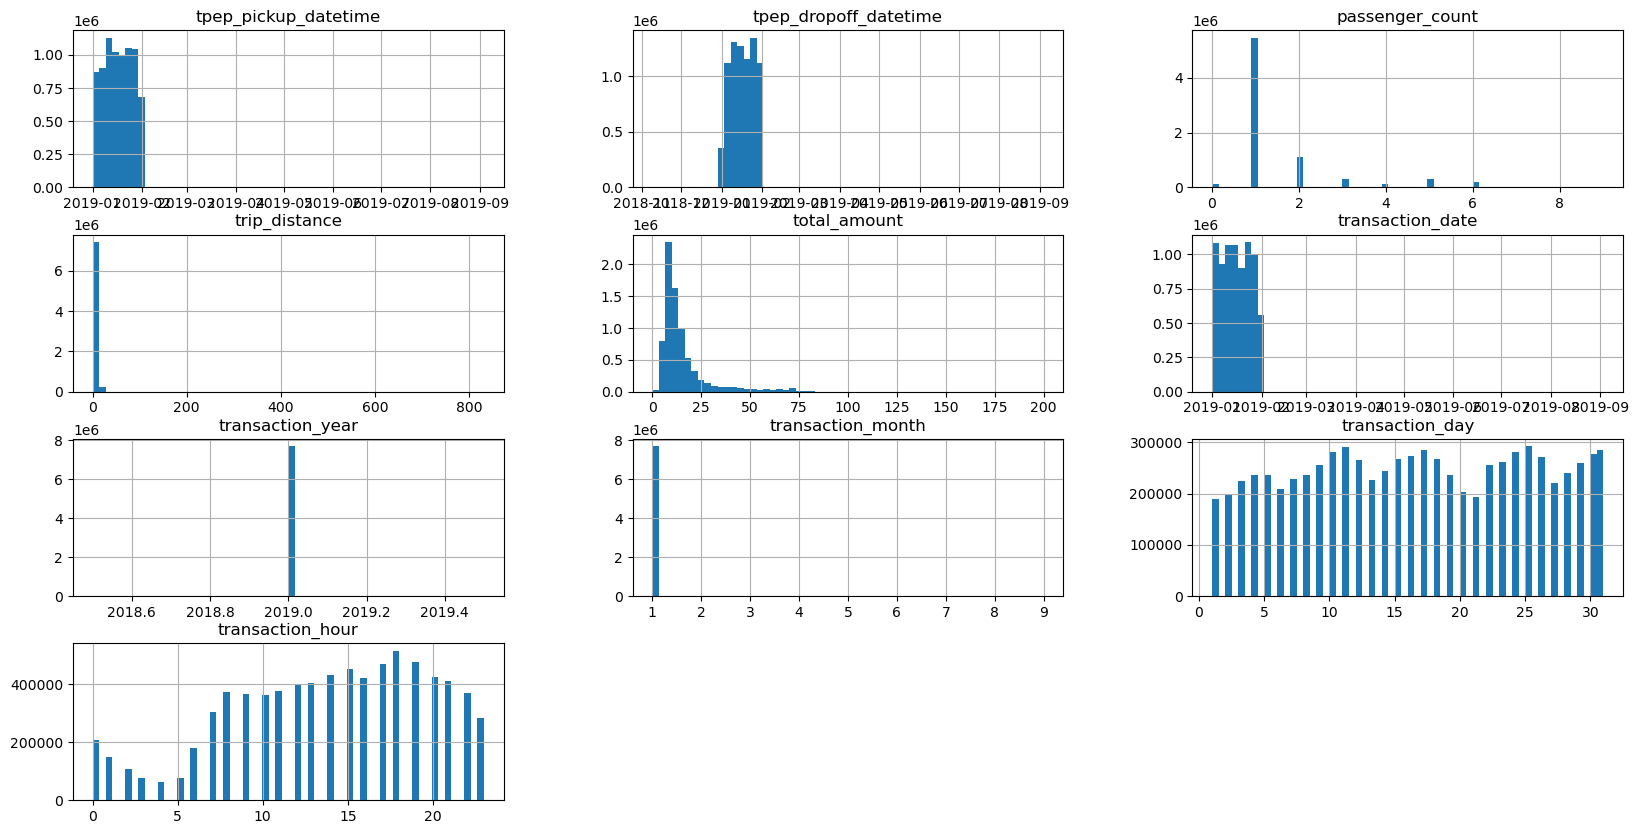

In [408]:
taxi_data_prepaired.hist(figsize=(20,10), bins=60)

In [409]:
categorical_columns = ['PULocationID','transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns+numerical_columns

In [410]:
main_taxi_df = taxi_data_prepaired[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7687877, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [411]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()

In [412]:
taxi_grouped_by_region.head(100)

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-01-01,1,1,2,0.0,21.8000
1,1,2019-01-01,1,1,5,0.0,87.3000
2,1,2019-01-01,1,1,6,0.0,80.3000
3,1,2019-01-01,1,1,8,0.0,128.5800
4,1,2019-01-01,1,1,10,16.9,43.2450
...,...,...,...,...,...,...,...
95,1,2019-01-11,1,11,14,0.2,98.0125
96,1,2019-01-11,1,11,17,14.6,50.3000
97,1,2019-01-11,1,11,18,12.2,114.1000
98,1,2019-01-11,1,11,20,36.6,73.4500


In [413]:
taxi_grouped_by_region['count_of_transactions']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']

In [414]:
taxi_grouped_by_region.shape

(102782, 8)

In [415]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

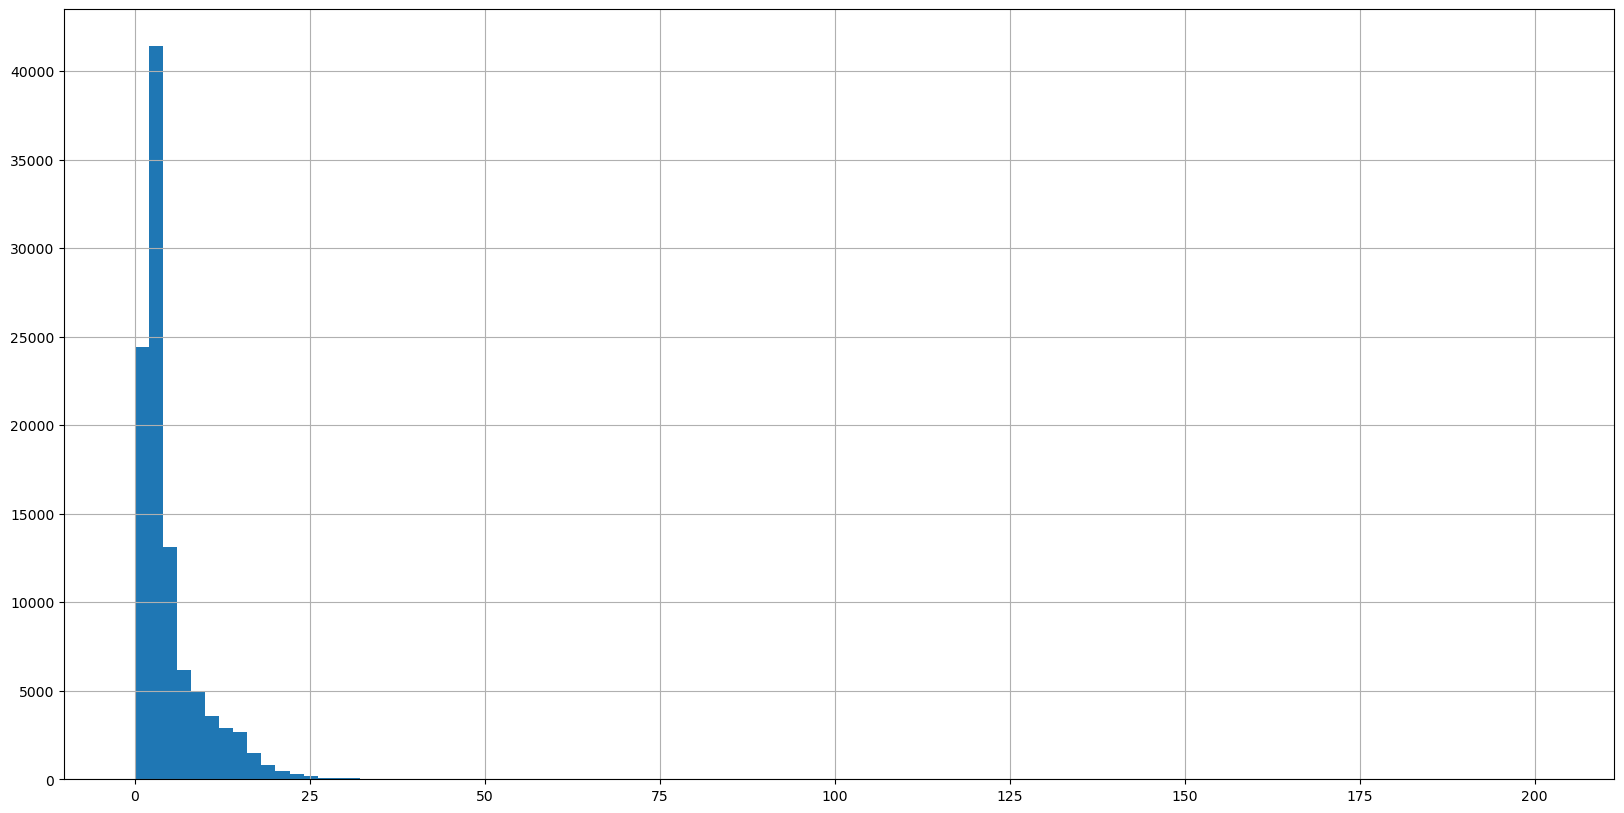

In [416]:
taxi_grouped_by_region['trip_distance'].hist(figsize=(20,10), bins=100)

<Axes: >

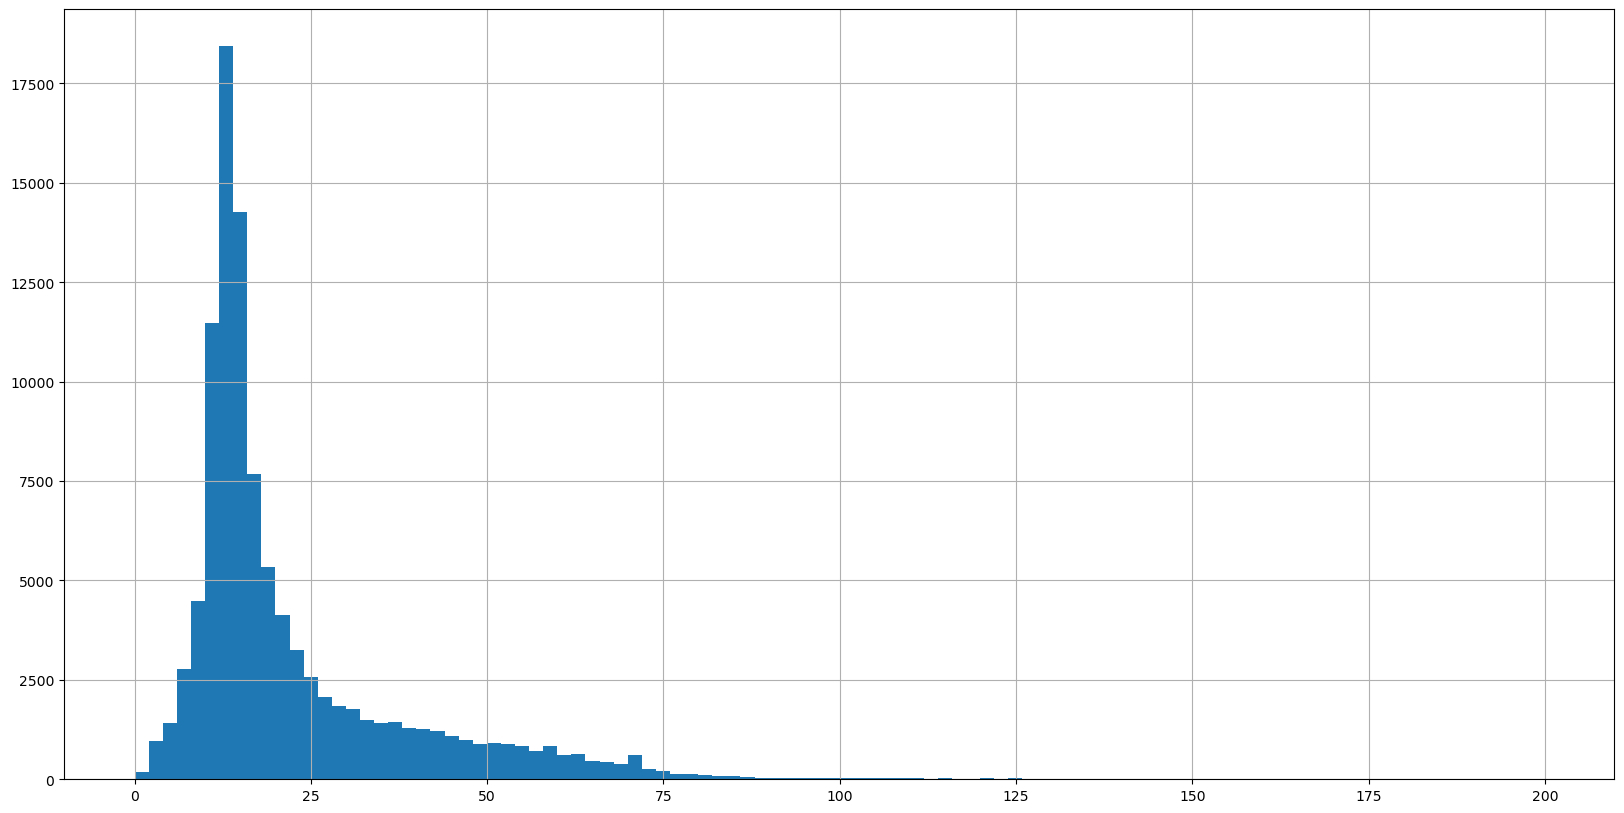

In [417]:
taxi_grouped_by_region['total_amount'].hist(figsize=(20,10), bins=100)

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [418]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [419]:
categorical_feature_benchmark = ['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_feature_benchmark = categorical_feature_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

## 5.1 Train-test split

In [420]:
from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench,y_bench, test_size=0.25, random_state=42)

In [421]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [422]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test_b,y_pred_b) )
print('mean_squared_error ', mean_squared_error(y_test_b,y_pred_b) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test_b,y_pred_b)) )
print('r2 ', r2_score(y_test_b,y_pred_b) )






mean_absolute_error  3.3779461247615217
mean_squared_error  61.407698233852884
root_mean_squared_error  7.836306415260501
r2  0.7939291153157397


<Axes: xlabel='true', ylabel='pred'>

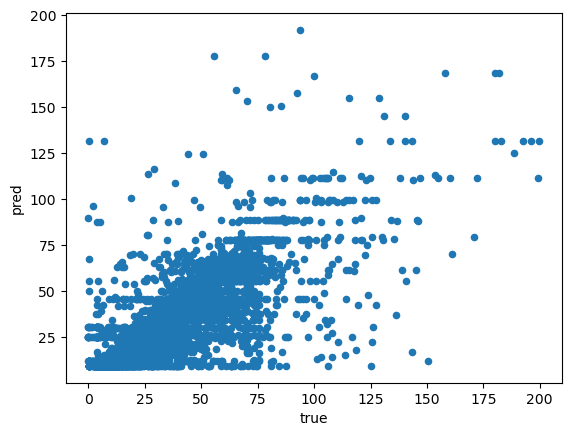

In [423]:
data = {'true':y_test_b , 'pred': y_pred_b}
results = pd.DataFrame(data)
results.plot(kind= 'scatter', x= 'true', y = 'pred')

In [424]:
categorical_feature_benchmark = ['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_feature_benchmark = categorical_feature_benchmark
target_feature_benchmark = 'total_amount'

from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench,y_bench, test_size=0.25, random_state=42)

#fit the model
tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train_b, y_train_b)

model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test_b,y_pred_b) )
print('mean_squared_error ', mean_squared_error(y_test_b,y_pred_b) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test_b,y_pred_b)) )
print('r2 ', r2_score(y_test_b,y_pred_b) )


mean_absolute_error  10.69494904319421
mean_squared_error  241.10759347083697
root_mean_squared_error  15.52763966193307
r2  0.19089533528163072


<Axes: xlabel='true', ylabel='pred'>

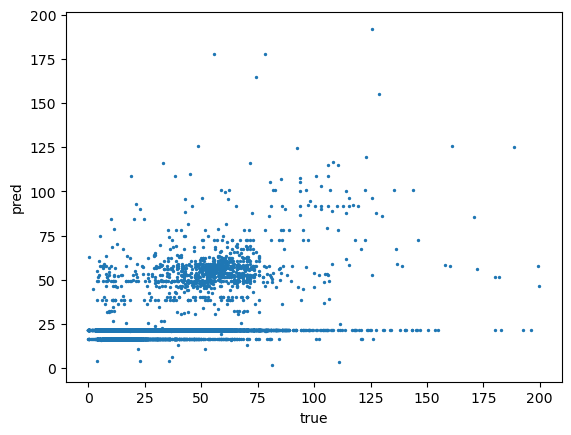

In [425]:
data = {'true':y_test_b , 'pred': y_pred_b}
results = pd.DataFrame(data)
results.plot(kind= 'scatter', x= 'true', y = 'pred', s=2)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [317]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [392]:
data_with_new_features = taxi_grouped_by_region.copy()

### Date related features

In [440]:
taxi_grouped_by_region.dtypes

PULocationID                     object
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
dtype: object

In [438]:
data_with_new_features.loc[:,'transaction_date'] = pd.to_datetime(data_with_new_features.loc[:,'transaction_date'])

In [426]:
# data_with_new_features.loc[:,'transaction_date'] = pd.to_datetime(data_with_new_features.loc[:,'transaction_date'], format='%Y-%m-%d', errors='coerce')  

In [437]:
# data_with_new_features['transaction_date'].astype('datetime64[us]')
data_with_new_features['transaction_date'].dtype

dtype('O')

In [442]:
data_with_new_features['transaction_week_day'] = taxi_grouped_by_region['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x:True if x==5 or x==6 else False)

In [445]:
from pandas. tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [446]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01 00:00:00,1,1,2,0.0,21.800,1,1,False,False
1,1,2019-01-01 00:00:00,1,1,5,0.0,87.300,1,1,False,False
2,1,2019-01-01 00:00:00,1,1,6,0.0,80.300,1,1,False,False
3,1,2019-01-01 00:00:00,1,1,8,0.0,128.580,2,1,False,False
4,1,2019-01-01 00:00:00,1,1,10,16.9,43.245,4,1,False,False


In [448]:
zone_lookup = pd.read_csv('Data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [449]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01 00:00:00,1,1,2,0.0,21.800,1,1,False,False,EWR
1,1,2019-01-01 00:00:00,1,1,5,0.0,87.300,1,1,False,False,EWR
2,1,2019-01-01 00:00:00,1,1,6,0.0,80.300,1,1,False,False,EWR
3,1,2019-01-01 00:00:00,1,1,8,0.0,128.580,2,1,False,False,EWR
4,1,2019-01-01 00:00:00,1,1,10,16.9,43.245,4,1,False,False,EWR


In [450]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        45379
Brooklyn         23721
Queens           22004
Bronx             9649
Unknown            745
Staten Island      304
EWR                271
Name: count, dtype: int64